# **Author: Rosita Yuliana**

Here, I work with MCD Nutrition Facts Data to gain a better insight in MCD's Menu such as number of caloric intake of specific menu.

First, import libraries and dataset.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('menu.csv')

dataset.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


Before we begin to interpret the MCD Data, we can try to checking the data type, how many rows and columns in data, or we can gain statistic information of the data.

In [ ]:
# checking data type
dataset.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [ ]:
# data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [ ]:
# checking data size
dataset.shape

(260, 24)

In [ ]:
dataset.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


From explanation above we can understand that there are no duplicated data or missing value. Then, we can jump to the next step.

# **Total Calories Average**

I want to know how many calories average of MCD's meal by each category

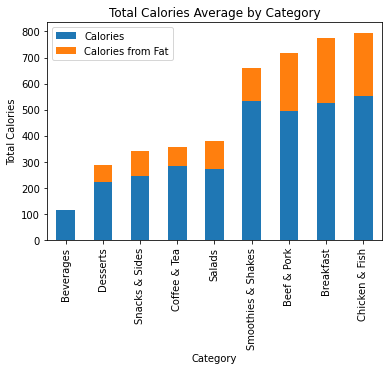

In [ ]:
# How many calories does the average McDonald's value meal contain?

calories_data = dataset.iloc[:,0:5]
calories_data['Total Calories'] = calories_data['Calories']+calories_data['Calories from Fat']
calories_by_category = calories_data.groupby('Category').mean().sort_values(by='Total Calories')
calories_by_category

calories_by_category.iloc[:,:2].plot(kind='bar', stacked=True)
plt.title('Total Calories Average by Category')
plt.ylabel('Total Calories')
plt.show()

From the graph above, **we can see that 'smoothies & shakes' has the highest calories average, however, beverages has the lowest calories average amongs all category.**

# Beverages Contribute to Overall Caloric Intake

Then, how much do each beverages contribute to overall caloric intake?

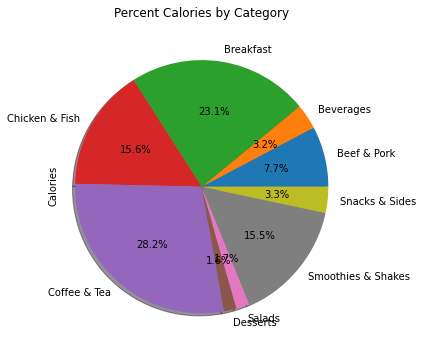

In [ ]:
# How much do beverages, like soda or coffee, contribute to the overall caloric intake?
calories_by_categorysum = calories_data.groupby('Category', axis=0).sum()
calories_by_categorysum

calories_by_categorysum['Calories'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            shadow=True,       # add shadow      
                            )

plt.title('Percent Calories by Category')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

To gain more understanding about the data, i want to know how much percent beverages contributes to overall caloric intake. **Based on the pie chart, we can see that beverages give 3.2% caloric.**

# **Grilled Chicken vs Crispy Chicken**

I want to know which one of grilled chicken or crispy chicken give a better nutrition. By asumming nutrition is total value of Calories, Total Fat, Saturated Fat, Cholesterol, Sodium, Carbohydrates, Dietary Fiber, Sugars, Protein.

In [ ]:
sandwich_data = dataset[dataset['Item'].str.contains('Sandwich')]
sandwich_data = sandwich_data.iloc[:,[1,6,8,11,13,15,17,20,21,22,23]]
sandwich_data['Total Daily Value'] = sandwich_data.sum(axis=1)
sandwich_data['Chicken Type'] = sandwich_data['Item'].str.extract("(Crispy|Grilled)")
sandwich_data['Item Type'] = sandwich_data['Item'].str.extract("(Classic|Club|Ranch|Bacon|Southern)")
sandwich_data



,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Daily Value,Chicken Type,Item Type
57,Premium Crispy Chicken Classic Sandwich,33,18,16,41,18,13,4,6,15,20,184,Crispy,Classic
58,Premium Grilled Chicken Classic Sandwich,13,9,22,34,14,13,4,8,15,20,152,Grilled,Classic
59,Premium Crispy Chicken Club Sandwich,51,44,29,59,19,14,8,20,30,20,294,Crispy,Club
60,Premium Grilled Chicken Club Sandwich,31,36,35,52,15,13,8,20,30,20,260,Grilled,Club
61,Premium Crispy Chicken Ranch BLT Sandwich,43,31,24,58,19,13,4,20,15,20,247,Crispy,Ranch
62,Premium Grilled Chicken Ranch BLT Sandwich,23,22,30,51,14,13,4,20,15,20,212,Grilled,Ranch
63,Bacon Clubhouse Crispy Chicken Sandwich,59,51,31,72,22,15,8,25,30,15,328,Crispy,Bacon
64,Bacon Clubhouse Grilled Chicken Sandwich,39,42,37,65,17,15,8,30,30,15,298,Grilled,Bacon
65,Southern Style Crispy Chicken Sandwich,29,15,14,38,14,7,4,2,15,15,153,Crispy,Southern


In [ ]:

sandwich_datax = dataset[dataset['Item'].str.contains('Sandwich')]
#sandwich_datax = sandwich_datax.iloc[:,[3,5,8,11,13,15,17,20,21,22,23]]
sandwich_datax = sandwich_datax.iloc[:,[1,3,5,7,10,12,14,16,18,19]]
sandwich_datax['Chicken Type'] = sandwich_datax['Item'].str.extract("(Crispy|Grilled)")
sandwich_datax

,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Chicken Type
57,Premium Crispy Chicken Classic Sandwich,510,22.0,3.5,45,990,55,3,10,24,Crispy
58,Premium Grilled Chicken Classic Sandwich,350,9.0,2.0,65,820,42,3,8,28,Grilled
59,Premium Crispy Chicken Club Sandwich,670,33.0,9.0,85,1410,58,3,11,36,Crispy
60,Premium Grilled Chicken Club Sandwich,510,20.0,7.0,105,1250,44,3,9,40,Grilled
61,Premium Crispy Chicken Ranch BLT Sandwich,610,28.0,6.0,70,1400,57,3,11,32,Crispy
62,Premium Grilled Chicken Ranch BLT Sandwich,450,15.0,4.5,90,1230,43,3,9,36,Grilled
63,Bacon Clubhouse Crispy Chicken Sandwich,750,38.0,10.0,90,1720,65,4,16,36,Crispy
64,Bacon Clubhouse Grilled Chicken Sandwich,590,25.0,8.0,110,1560,51,4,14,40,Grilled
65,Southern Style Crispy Chicken Sandwich,430,19.0,3.0,45,910,43,2,7,21,Crispy


In [ ]:
sandwich_datax['Total Calories'] = sandwich_datax['Calories']+sandwich_datax['Total Fat']+sandwich_datax['Saturated Fat']+sandwich_datax['Sodium']+sandwich_datax['Carbohydrates']+sandwich_datax['Dietary Fiber']+sandwich_datax['Sugars']+sandwich_datax['Protein']+sandwich_datax['Cholesterol']

nutrition_by_item = sandwich_datax.groupby('Item').mean().sort_values(by='Item')
nutrition_by_item


,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Total Calories
Item,,,,,,,,,,
Bacon Clubhouse Crispy Chicken Sandwich,750,38.0,10.0,90,1720,65,4,16,36,2729.0
Bacon Clubhouse Grilled Chicken Sandwich,590,25.0,8.0,110,1560,51,4,14,40,2402.0
Premium Crispy Chicken Classic Sandwich,510,22.0,3.5,45,990,55,3,10,24,1662.5
Premium Crispy Chicken Club Sandwich,670,33.0,9.0,85,1410,58,3,11,36,2315.0
Premium Crispy Chicken Ranch BLT Sandwich,610,28.0,6.0,70,1400,57,3,11,32,2217.0
Premium Grilled Chicken Classic Sandwich,350,9.0,2.0,65,820,42,3,8,28,1327.0
Premium Grilled Chicken Club Sandwich,510,20.0,7.0,105,1250,44,3,9,40,1988.0
Premium Grilled Chicken Ranch BLT Sandwich,450,15.0,4.5,90,1230,43,3,9,36,1880.5
Southern Style Crispy Chicken Sandwich,430,19.0,3.0,45,910,43,2,7,21,1480.0


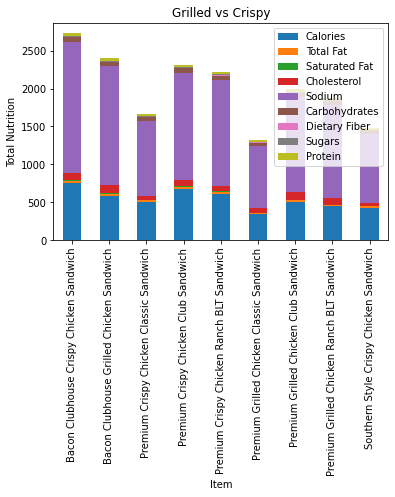

<Figure size 720x504 with 0 Axes>

In [ ]:
nutrition_by_item.iloc[:,[0,1,2,3,4,5,6,7,8]].plot(kind='bar', stacked=True)
#nutrition_by_item.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]].plot(kind='bar', stacked=True)
plt.title('Grilled vs Crispy')
plt.ylabel('Total Nutrition')
plt.figure(figsize=(10,7))
plt.show()

In [ ]:
nutrition_by_type = sandwich_datax.groupby('Chicken Type').mean().sort_values(by='Chicken Type')
nutrition_by_type


,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Total Calories
Chicken Type,,,,,,,,,,
Crispy,594.0,28.00,6.300,67.0,1286.0,55.6,3.00,11.0,29.8,2080.700
Grilled,475.0,17.25,5.375,92.5,1215.0,45.0,3.25,10.0,36.0,1899.375


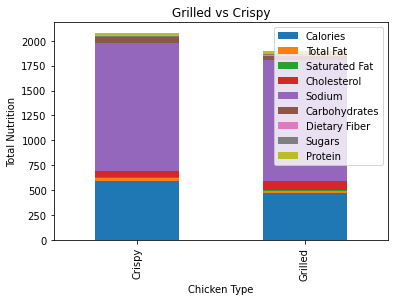

<Figure size 720x504 with 0 Axes>

In [ ]:
# Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?

nutrition_by_type.iloc[:,[0,1,2,3,4,5,6,7,8]].plot(kind='bar', stacked=True)
#nutrition_by_item.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]].plot(kind='bar', stacked=True)
plt.title('Grilled vs Crispy')
plt.ylabel('Total Nutrition')
plt.figure(figsize=(10,7))
plt.show()

**If we see in general based on the graph above, crispy sandwich give higher nutritions than grilled sandwich.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


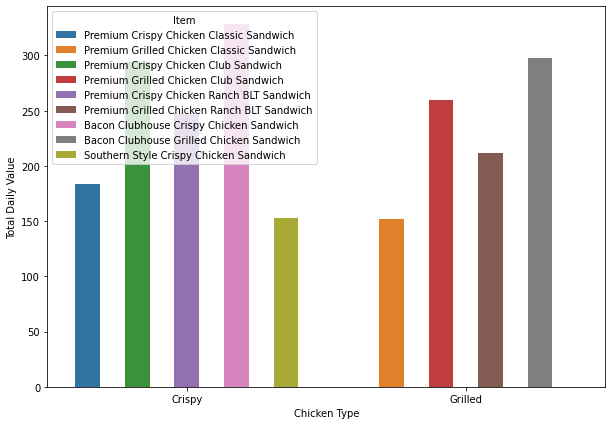

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(sandwich_data['Chicken Type'], sandwich_data['Total Daily Value'], hue=sandwich_data['Item'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


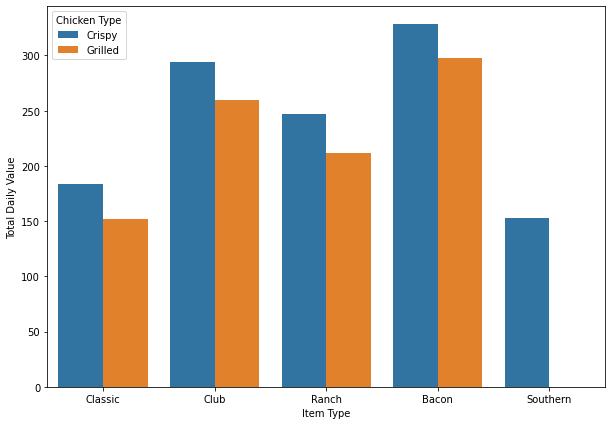

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(sandwich_data['Item Type'], sandwich_data['Total Daily Value'], hue=sandwich_data['Chicken Type'])
plt.show()

# **Whole eggs vs Egg Whites**

I want to know which one of whole eggs or egg whites give a better nutrition. By asumming nutrition is total value of Calories, Total Fat, Saturated Fat, Cholesterol, Sodium, Carbohydrates, Dietary Fiber, Sugars, Protein.

In [ ]:
egg_data = dataset[dataset['Item'].str.contains('Egg')]
#sandwich_datax = sandwich_datax.iloc[:,[3,5,8,11,13,15,17,20,21,22,23]]
egg_data = egg_data.iloc[:,[1,3,5,7,10,12,14,16,18,19]]
egg_data['Egg Type'] = egg_data['Item'].str.extract("(Egg Whites|Egg)")
egg_data['Egg Type'] = egg_data['Egg Type'].map({'Egg Whites': "Egg Whites", 'Egg': "Whole Eggs"})

egg_data

,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Egg Type
0,Egg McMuffin,300,13.0,5.0,260,750,31,4,3,17,Whole Eggs
1,Egg White Delight,250,8.0,3.0,25,770,30,4,3,18,Whole Eggs
3,Sausage McMuffin with Egg,450,28.0,10.0,285,860,30,4,2,21,Whole Eggs
4,Sausage McMuffin with Egg Whites,400,23.0,8.0,50,880,30,4,2,21,Egg Whites
5,Steak & Egg McMuffin,430,23.0,9.0,300,960,31,4,3,26,Whole Eggs
6,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",460,26.0,13.0,250,1300,38,2,3,19,Whole Eggs
7,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",520,30.0,14.0,250,1410,43,3,4,19,Whole Eggs
8,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",410,20.0,11.0,35,1300,36,2,3,20,Whole Eggs
9,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",470,25.0,12.0,35,1420,42,3,4,20,Whole Eggs
12,Sausage Biscuit with Egg (Regular Biscuit),510,33.0,14.0,250,1170,36,2,2,18,Whole Eggs


In [ ]:
nutrition_by_type_egg = egg_data.groupby('Egg Type').mean().sort_values(by='Egg Type')
nutrition_by_type_egg

,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
Egg Type,,,,,,,,,
Egg Whites,678.571429,36.571429,13.285714,42.857143,1585.714286,62.000000,4.142857,7.142857,25.571429
Whole Eggs,482.222222,25.500000,10.722222,191.666667,1238.888889,41.888889,2.777778,6.444444,21.888889


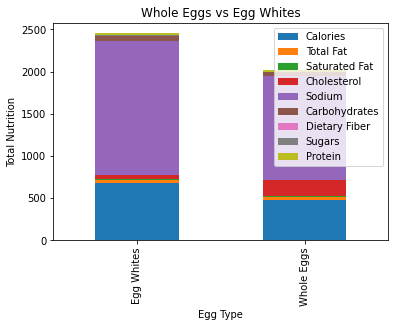

<Figure size 720x504 with 0 Axes>

In [ ]:
# What about ordering egg whites instead of whole eggs?

nutrition_by_type_egg.iloc[:,[0,1,2,3,4,5,6,7,8]].plot(kind='bar', stacked=True)
#nutrition_by_item.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]].plot(kind='bar', stacked=True)
plt.title('Whole Eggs vs Egg Whites')
plt.ylabel('Total Nutrition')
plt.figure(figsize=(10,7))
plt.rcParams["figure.figsize"] = [10,7]
plt.show()

If we see in general based on the graph above, **egg whites give higher nutritions than grilled sandwich.**